In [28]:
import numpy as np
import os
import math
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns 
from sklearn.metrics import confusion_matrix



In [6]:
x,y = fetch_openml('mnist_784' ,version=1,cache=True , return_X_y=True)#fetch image data 
y=y.astype(int)#convert y to int 

(70000, 784)


In [12]:
print('Data size : {0} x {1} and label size {2}'.format(x.shape[0] , x.shape[1] , y.shape[0]))
print('the images are of size:{0} x {0}'.format(math.sqrt (x.shape[1])))


Data size : 70000 x 784 and label size 70000
the images are of size:28.0 x 28.0


In [19]:
index7 = np.where(y==7)[0] #where y = 7 
print(index7.shape[0]) #index which has number 7 

7293


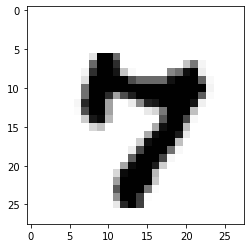

In [22]:
pick = index7[np.random.choice(index7.shape[0])]#choose random number from index of number 7
digit_7 = x[pick , : ] # pixels of this number 
digit_7_image = digit_7.reshape(28 , 28) #reshape it as 28 * 28
plt.imshow(digit_7_image , cmap= matplotlib.cm.binary)#draw it 

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size=0.1 , stratify=y , random_state=42)
print( " The Number of Training data is =" ,x_train.shape[0] )
print( " The Number of Training data is =" ,x_test.shape[0] )

 The Number of Training data is = 63000
 The Number of Training data is = 7000


# Binary Classfier


In [24]:
y_train_7 = (y_train == 7) # true // false 
y_test_7 = (y_test == 7) 
MLP_model = MLPClassifier( max_iter=20 ,solver='sgd' , verbose='true')
MLP_model.fit(x_train , y_train)

Iteration 1, loss = 1.74565354
Iteration 2, loss = 0.63608713
Iteration 3, loss = 0.50121972
Iteration 4, loss = 0.43127443
Iteration 5, loss = 0.34738759
Iteration 6, loss = 0.32208259
Iteration 7, loss = 0.30195669
Iteration 8, loss = 0.27716757
Iteration 9, loss = 0.26307004
Iteration 10, loss = 0.25356449
Iteration 11, loss = 0.24461029
Iteration 12, loss = 0.23339430
Iteration 13, loss = 0.22743475
Iteration 14, loss = 0.22020099
Iteration 15, loss = 0.21255749
Iteration 16, loss = 0.20841867
Iteration 17, loss = 0.20403079
Iteration 18, loss = 0.20125787
Iteration 19, loss = 0.19708612
Iteration 20, loss = 0.19339597


C:\Users\tamer\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=20, solver='sgd', verbose='true')

In [28]:
print(MLP_model.n_layers_ ) #hidden layer 
print( MLP_model.hidden_layer_sizes) #hidden layer size

for layer in range (MLP_model.n_layers_-1):
    print("layer", layer , "weights" , MLP_model.coefs_[layer].shape , "Bias is",MLP_model.intercepts_[layer].shape)

3
(100,)
layer 0 weights (784, 100) Bias is (100,)
layer 1 weights (100, 10) Bias is (10,)


In [25]:
y_pred = MLP_model.predict(x_train)
y_pred_test = MLP_model.predict(x_test)


In [29]:
def drawing_conf_matrix (y_actual , y_predict):
    print(classification_report (y_actual , y_predict))
    
    conf_mat = confusion_matrix( y_actual , y_predict)
    
    print(conf_mat)
    sns.heatmap(conf_mat , annot= True , fmt = "")
    plt.ylabel('True label')
    plt.xlabel('predict label')


C:\Users\tamer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tamer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tamer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.11      0.20     56436
           1       0.00      0.00      0.00      6564
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.10     63000
   macro avg       0.10      0.01      0.02     63000
weighted avg       0.90      0.10      0.18     63000

[[6296 6970 6158 6565 5741 5247 6256  203 6377 6623]
 [   6    9   61  105   19    3    1 6223   12  125]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0   

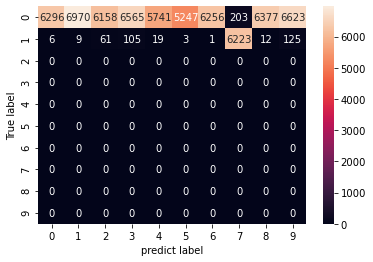

In [30]:
drawing_conf_matrix(y_train_7 , y_pred)